In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


 '''loads e imports the keras and datasets modules, and then loads the MNIST dataset using the load_data() function. The load_data() function returns two tuples, each of which contains two arrays: the training data and the training labels, and the test data and the test labels.

The training data is a three-dimensional array with shape (60000, 28, 28). Each element in the array is a pixel in an image. The training labels are a one-dimensional array with shape (60000,). Each element in the array is the label for an image.

The test data is a three-dimensional array with shape (10000, 28, 28). Each element in the array is a pixel in an image. The test labels are a one-dimensional array with shape (10000,). Each element in the array is the label for an image'''

In [13]:
y_train.size

60000

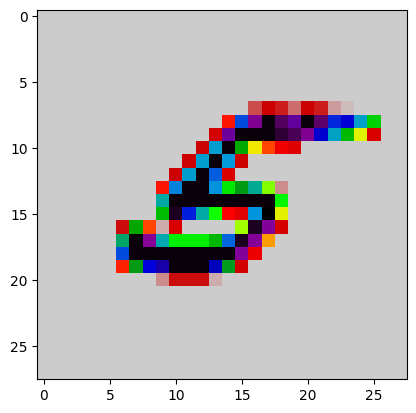

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X_train[899], cmap='nipy_spectral_r')

In [22]:
X_train = X_train/255; X_test = X_test/255

In [ ]:
X_train[2]

In [25]:
# The Crux
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Flatten is used to converge our training input
of dimension 28x28 into continuous 784 pixels (single line input)

Dense is used to add hidden layer and its respective activation function





In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#tbr
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics =['accuracy'])

In [30]:
hist = model.fit(X_train, y_train, epochs = 30, validation_split = 0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0358 - accuracy: 0.9883 - val_loss: 0.0917 - val_accuracy: 0.9745
Epoch 2/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.0995 - val_accuracy: 0.9737
Epoch 3/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 0.0976 - val_accuracy: 0.9740
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.1259 - val_accuracy: 0.9730
Epoch 5/30
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.1098 - val_accuracy: 0.9750
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.1172 - val_accuracy: 0.9743
Epoch 7/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.1200 - val_accuracy

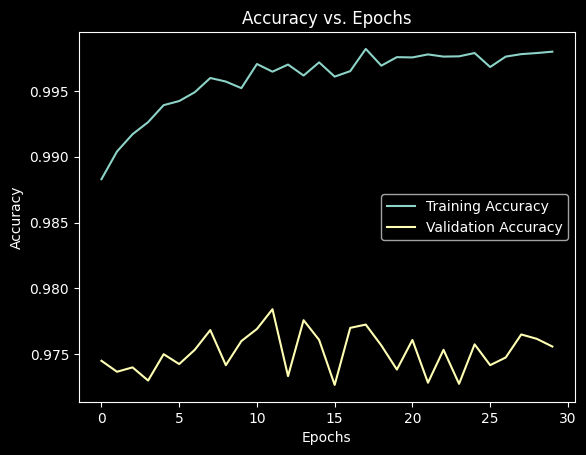

In [33]:
plt.style.use('dark_background')
plt.plot(hist.history['accuracy'], label = 'Training Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

In [34]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [38]:
y_prob

array([[1.45732205e-18, 9.74668530e-16, 1.34236946e-17, ...,
        9.99999940e-01, 1.77938289e-16, 2.10399389e-11],
       [5.47228318e-29, 1.66060026e-15, 9.99999940e-01, ...,
        4.79251633e-28, 8.42692073e-15, 1.30008902e-36],
       [1.82367252e-16, 9.99999940e-01, 3.39088306e-11, ...,
        3.13131396e-11, 1.42170089e-08, 1.60064759e-17],
       ...,
       [1.10002433e-24, 9.74381902e-17, 1.25598130e-29, ...,
        3.42545517e-17, 1.77342192e-21, 3.58857367e-13],
       [9.29907342e-24, 6.09611596e-29, 6.90331130e-26, ...,
        2.03678847e-26, 1.04943855e-16, 1.36490535e-29],
       [2.25963732e-23, 3.47517018e-30, 9.74297176e-23, ...,
        2.46655973e-30, 4.10979750e-19, 8.80723071e-34]], dtype=float32)

Gives 10 outputs or 10 probabilites, answer is the argmax or the highest probability

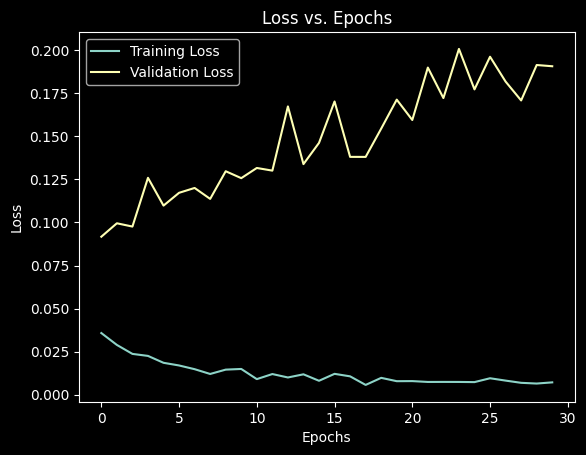

In [43]:
plt.style.use('dark_background')
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

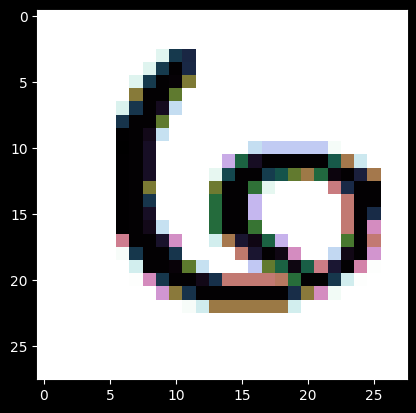

In [48]:
plt.imshow(X_test[54], cmap = "cubehelix_r")

In [53]:
model.predict(X_test[54].reshape(1,28,28)).argmax()

1/1 [==============================] - 0s 25ms/step


6

In [55]:
model.predict(X_test[5647].reshape(1,28,28)).argmax()

1/1 [==============================] - 0s 28ms/step


8

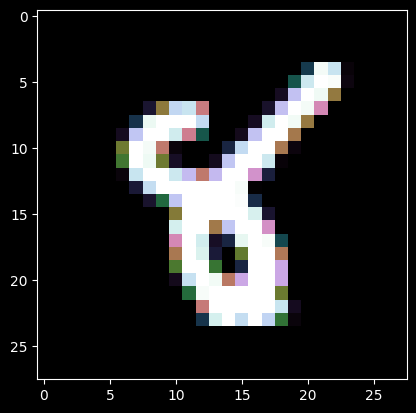

In [58]:
plt.imshow(X_test[5647], cmap = "cubehelix")